This notebook explores a simplified case of ray tracing artifacts that can arise in the full 3D volume rendering of data in spherical coordinates: 2D ray tracing of a circle.

Given a circle of some radius, rays parallel to the y axis are intersected with the circle to find the number of discretized ray points falling within the circle along each ray. 


In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
def get_circle_points(npts: int = 100, radius: float = 1.) -> tuple[np.ndarray, np.ndarray]:
    phi = np.linspace(0, 2*np.pi, npts)
    return radius * np.cos(phi), radius * np.sin(phi)

In [3]:
def get_lines(x_bounds: tuple[float, float], 
              y_bounds: tuple[float, float],
              npts_per_line: int, 
              n_lines:int) -> list[tuple[np.ndarray, np.ndarray]]:
    lines = []
    
    dx = (x_bounds[1] - x_bounds[0]) / (n_lines - 1)

    for iline in range(n_lines):
        x = x_bounds[0] + np.array((iline * dx,)*npts_per_line)
        y = np.linspace(y_bounds[0], y_bounds[1], npts_per_line)
        lines.append((x,y))
    return lines

In [4]:
radius = 1.0
circ_x, circ_y = get_circle_points(radius=radius)

In [5]:
bound_eps = .05
lines = get_lines((circ_x.min()-bound_eps, circ_x.max()+bound_eps), 
                  (circ_y.min()-bound_eps, circ_y.max()+bound_eps), 
                  20, 
                  10)

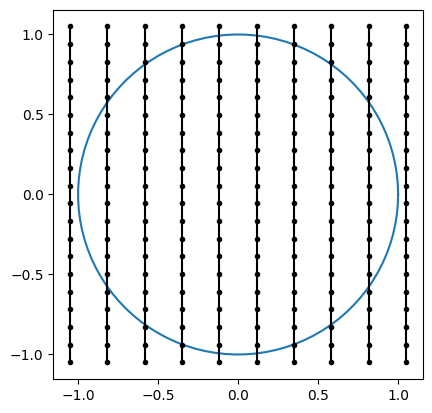

In [6]:
f, axs = plt.subplots(1)
axs.plot(circ_x, circ_y)
for line in lines:
    axs.plot(line[0], line[1], marker='.', color='k')
axs.set_aspect(1)

for each line, want to count points in the circle

In [7]:
def count_points_in_circle(lines: list[tuple[np.ndarray, np.ndarray]], 
                           radius: float) -> tuple[np.ndarray, np.ndarray]:
    result = []
    result_x_vals = []
    for line in lines:
        x, y = line 
        in_circle_mask = np.sqrt(x**2+y**2) < radius
        result.append(np.sum(in_circle_mask))
        # fixed x, just store it for plotting purposes
        result_x_vals.append(x[0])
    return np.array(result_x_vals), np.array(result)

In [8]:
xvals, n_pts_in_circle = count_points_in_circle(lines, radius)

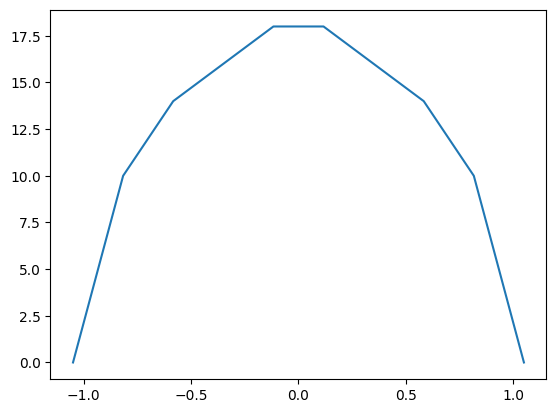

In [9]:
plt.plot(xvals, n_pts_in_circle)

Text(0, 0.5, 'points along ray falling in the circle')

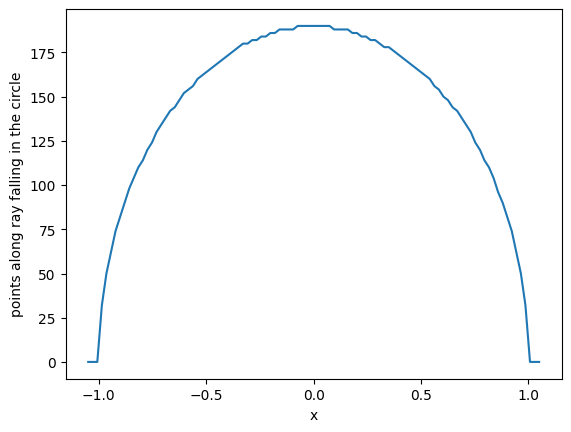

In [10]:
bound_eps = .05
lines = get_lines((circ_x.min()-bound_eps, circ_x.max()+bound_eps), 
                  (circ_y.min()-bound_eps, circ_y.max()+bound_eps), 
                  200, 
                  100,)
xvals, n_pts_in_circle = count_points_in_circle(lines, radius)
plt.plot(xvals, n_pts_in_circle)
plt.xlabel('x') 
plt.ylabel('points along ray falling in the circle')

OR, integrated distance along each line

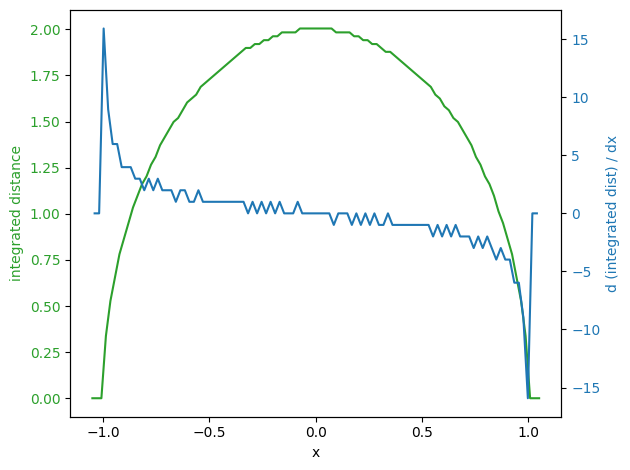

In [17]:
dy = [lines[0][1][1] - lines[0][1][0]] # y spacing along each ray is the same

# also calculate the derivative
value = n_pts_in_circle* dy 
dvalue_dx = (value[1:] - value[:-1])/ (xvals[1:] - xvals[:-1])
xcenter = (xvals[1:]+xvals[:-1])/2.


fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_xlabel('x')
ax1.set_ylabel('integrated distance', color=color)
ax1.plot(xvals, value, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('d (integrated dist) / dx', color=color)  # we already handled the x-label with ax1
ax2.plot(xcenter, dvalue_dx, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped